# ODE Integration
$\newcommand{\vec}[1]{{\bf #1}}$
$\newcommand{\ee}{\end{eqnarray}}$


## Euler's Method

Consider the following first order ordinary differential equation.
$$
\frac {d\vec{y}}{dt} = \vec{f}(\vec{y}, t),
$$
where $\vec{y}$ is a vector of variables, $t$ is the independent variable, and $\vec{f}$ is some arbitrary vector function of $\vec{y}$ and $t$.  We can use our definition of derivative to write: 
$$
\frac {d\vec{y}}{dt} \approx \frac {\vec{y}_{i+1} - \vec{y}_i}{\Delta t} = \vec{f}(\vec{y}_i, t_i),\label{eq:explicit}
$$
where $\Delta t = t_{i+1} - t_i$.  This is not the only choice that could have been made, it is also possible to write it as 
$$
\frac {\vec{y}_{i+1} - \vec{y}_i}{\Delta t} = \vec{f}(\vec{y}_{i+1}, t_{i+1}). \label{eq:implicit}
$$
The difference between these two is the choice of either $t_{i}$ or $t_{i+1}$ on the right hand side.  Equation (\ref{eq:implicit}) gives rise to implicit methods which are harder to code up, but offers potentially greater stability and speed.  Instead, we will focus on equation (\ref{eq:explicit}).  

If we know the value at $\vec{y}(t_i)$, we can solve for $\vec{y}(t_{i+1})$ to be
$$
\vec{y}_{i+1} = \vec{y}_i + \vec{f}(\vec{y}_i, t_i)\Delta t.\label{eq:euler method}
$$
This method is known as Euler's method.  As an aside, it we take $\vec{f}$ to be a scalar function of just $t$, then it just becomes an ordinary integral.  Hence, the methodology we describe here is directly relevant for numerical integration so we don't need a separate discussion for it.

Equation (\ref{eq:euler method}) gives the correct answer for $\Delta t \rightarrow 0$, but it should never be used solving any equations you code up on a computer as superior methods abound\footnote{Of course in the movie Hidden Figures, the lead protagonist uses Euler's method to ensure that John Glenn lands safely. Then again the computer was a human being.}.  To see why Euler's method is not recommended, let consider the error that this algorithm introduces for finite $\Delta t$.  We do a Taylor expansion of the true solution, $\vec{y}(t)$:
$$
\vec{y}_{i+1} \approx \vec{y}_i + \frac{d\vec{y}}{d t}(t_i)\Delta t + \frac 1 2 \frac{d^2\vec{y}}{d t^2}(t_i)\Delta t^2 + \mathcal{O}(\Delta t^3)
$$
The first two terms constitute Euler's method, so for each time step, we will accumulate an error that is proportional to $\Delta t^2$.  Since the number of steps over an interval $T$ goes like $T/\Delta t$, then the total error scales like $1/\Delta t$.  So for sufficiently small $\Delta t$, then the error is reduced, but it comes at the cost of lots of steps.  Because of the scaling with error, Euler's method is known as a first-order method.  To get better results we want scaling that reduces the error as much as possible. 

As an example, lets consider the equation 
$$
\frac {dy}{dt} = \cos(t).
$$
We can see that we can solve this analytically by noting
$$
y(t) = \int\cos(t) dt = \sin(t) + C,
$$
where $C$ is a constant.  Let see how we can do this numerically. First we define a function for the derivatives

In [1]:
import numpy as np

def derivatives( t, y) : 
    return np.cos(t)

Now you might wonder about the second variable in the derivatives function. We shall return to this shortly. Now let us define the Euler method.  

In [2]:
def euler(t, delta_t, y) : 
    return y + derivatives(t,y)*delta_t

Note that the euler function above follows the exact definition of euler's method as defined above.  Now lets drive this between $t=0$ and $t=100$

In [3]:
def run_euler(N=1000, t0=0, t1=100) :
    delta_t = (t1-t0)/N
    y = 0

    t_array = np.arange(t0,t1,delta_t)
    y_array = np.zeros(t_array.size+1)

    y_array[0] = y
    for i in range(t_array.size):
        y_array[i+1] = euler(t_array[i], delta_t, y_array[i])
    return t_array, y_array

<IPython.core.display.Javascript object>


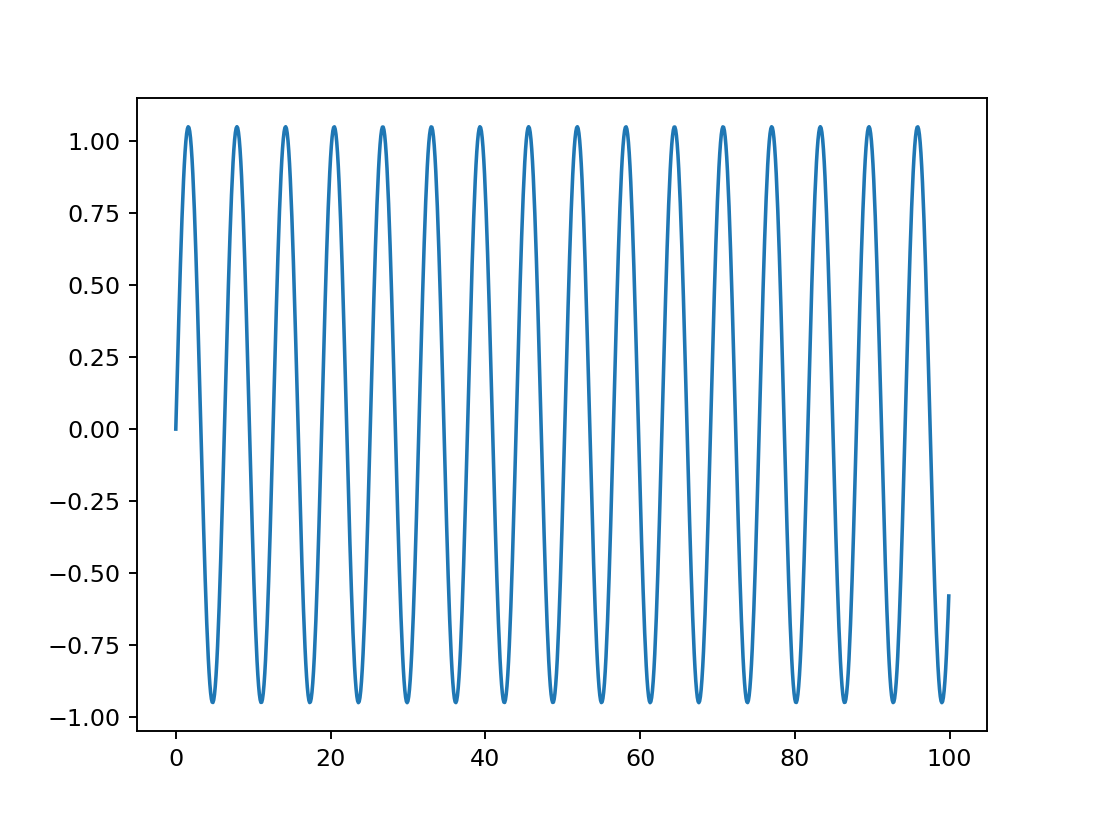

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt

t_array, y_array = run_euler()
plt.plot(t_array, y_array[:-1])
plt.show()


## Runge-Kutta 2 step (RK2)

Euler's method is beautifully simple, elegant, and not that accurate.  There are much better methods abound, mainly ones that are much more accurate.  There is a slightly more complicated method that can give much better answers.

Runge-Kutta methods are an example of predictor-corrector methods.  That is, it ``predicts'' the value at $\vec{y}_{i+1}$ from the current solution at $\vec{y}_i$.  Using this predicted value, it performs a ``corrector'' step to increase the accuracy of the solution.  The generic two-step Runge-Kutta method is as follows:
$$
\vec{k}_1 = \Delta t \vec{f}(\vec{y}_i, t_i) 
$$
$$
\vec{k}_2 = \Delta t \vec{f}(\vec{y}_i + \beta \vec{k}_1, t_i + \alpha \Delta t) 
$$
$$
\vec{y}_{i+1} = \vec{y}_i + a \vec{k}_1 + b \vec{k}_2
$$
where $\vec{k}_1$ is the ``predictor'' and is the same as an Euler step, $\vec{k}_2$ is the ``corrector'', and the $i+1$ step is some linear combination of the two.  The constants, $\alpha$, $\beta$, $a$, and $b$ are chosen to make the entire algoritm accurate to $\mathcal{O}(\Delta t^3)$.  To determine these unknown constants, let perform a Taylor expansion of $\vec{y}_{i+1}$
$$
\vec{y}_{i+1} = \vec{y}_i + \frac{d\vec{y}}{d t}(t_i)\Delta t + \frac 1 2 \frac{d^2\vec{y}}{dt^2}(t_i)\Delta t^2
$$
Now 
$$
\frac{d^2\vec{y}}{dt^2}(t_i) = \frac {d\vec{f}(\vec{y},t)}{dt} = \frac {\partial \vec{f}(\vec{y},t)}{\partial t} + \frac{d\vec{y}}{dt}\cdot\vec{\nabla}_{\vec{y}}\vec{f} 
$$
$$
= \frac {\partial \vec{f}(\vec{y},t)}{\partial t} + \vec{f}\cdot\vec{\nabla}_{\vec{y}}\vec{f}
$$  
Thus we have 
\be
\vec{y}_{i+1} = \vec{y}_i + \vec{f}(\vec{y}_i, t_i)\Delta t + \frac 1 2 \left(\frac {\partial \vec{f}(\vec{y}_i,t_i)}{\partial t} + \vec{f}(\vec{y}_i,t_i)\cdot\vec{\nabla}_{\vec{y}}\vec{f}(\vec{y}_i,t_i)\right)\Delta t^2 +\mathcal{O}(\Delta t^3)\label{eq:2nd order}
\ee
Now we Taylor expand out $\vec{k}_2$ to find
\be
\vec{k}_2 &=& \Delta t \vec{f}(\vec{y}_i + \beta \vec{k}_1, t_i + \alpha \Delta t) \\
&=& \Delta t\left( \vec{f}(\vec{y}_i, t_i) + \alpha\Delta t\frac {\partial \vec{f}(\vec{y}_i,t_i)}{\partial t} + \beta\Delta t \vec{f}\cdot\vec{\nabla}_{\vec{y}}\vec{f}(\vec{y}_i,t_i)\right)
\ee
Putting this all together, we have 
\be
\vec{y}_{i+1} &=& \vec{y}_i + (a+b)\Delta t \vec{f}(\vec{y}_i, t_i) + b\Delta t^2\left(\alpha\frac {\partial \vec{f}(\vec{y}_i,t_i)}{\partial t} + \beta\vec{f}\cdot\vec{\nabla}_{\vec{y}}\vec{f}(\vec{y}_i,t_i) \right)+\mathcal{O}(\Delta t^3)\label{eq:rk2 expansion}
\ee
Comparing Equations (\ref{eq:2nd order}) and (\ref{eq:rk2 expansion}), we get the following conditions:
\be
a+b = 1 \qquad b\alpha = \frac 1 2 \qquad b\beta = \frac 1 2,
\ee
or 3 equation for 4 unknowns.  So that mean there exist a infinite number of second order schemes that are possible, e.g., error per step that goes likes $\Delta t^3$, so the total error over an interval goes like $\Delta t^2$.  So using $\alpha$ as a parameter, we have 
\be
\beta = \alpha \qquad b = \frac 1 {2\alpha} \qquad a = 1 - \frac 1 {2\alpha}
\ee
So a generic second order Runge-Kutta scheme is then
\be
\vec{k}_1 &=& \Delta t \vec{f}(\vec{y}_i, t_i) \\
\vec{k}_2 &=& \Delta t \vec{f}(\vec{y}_i + \alpha \vec{k}_1, t_i + \alpha \Delta t) \\
\vec{y}_{i+1} &=& \vec{y}_i + \left(1 - \frac 1 {2\alpha}\right) \vec{k}_1 + \frac {\vec{k}_2} {2\alpha} 
\ee

A few famous examples are 
\begin{itemize}
    \item Midpoint method: $\alpha = 1/2$ Estimate the values of y at the midpoint and solve for the derivative at the midpoint.  Use this midpoint derivative to complete the integration.  Note that prefactor in front of $\vec{k}_1$ in this case is zero.
    \item Heun's Method: $\alpha = 1$ Estimate the values of y at the endpoint and give equal weight to both starting and endpoints to compute the derivative.
\end{itemize}


SEIR Model Example

## Higher Order ODEs

Thus far we have discussed the case of first order odes.  What about higher order ODEs.  It turns out that there is a very simple extension to arbitrary high order ODEs.  The trick is it identify higher order derivatives as variables in themselves.  Consider the ODE
$$
\sum_n^N\frac{d^n f}{dx^n} = 0
$$
We can write this as a sum first order ODEs by the identification of 
$$
f_i = \frac{df_{i-1}}{dx} \qquad\textrm{and}\qquad f_0 = f
$$
Thus we have 
$$
\frac{df_{N-1}}{dx} + \sum_i^{N-1} f_i = 0,
$$
$$
\frac{df}{dx} = f_1
$$
$$
\frac{df_1}{dx} = f_2
$$
$$
 . . . .
$$
$$
\frac{df_{N-2}}{dx} = f_{N-1}.
$$
So this converts a Nth order ODE to N first order ODEs, which we can solve.

As an example lets try a simple harmonic oscillator 
$$
\frac{d^2 x}{dt^2} = -x
$$
We of course know that the solution is 
$$
x(t) = A\cos(t+\phi)
$$

This is second order so we break this up into 2 first order equations
$$
\frac{dx}{dt} = v
\frac{dv}{dt} = -x
$$
Now lets implement this numerically.

In [5]:
def SHO_derivatives(t,y) :
    dydt = np.zeros(2)
    x = y[0]
    v = y[1]
    dydt[0] = v
    dydt[1] = -x
    return dydt

<IPython.core.display.Javascript object>


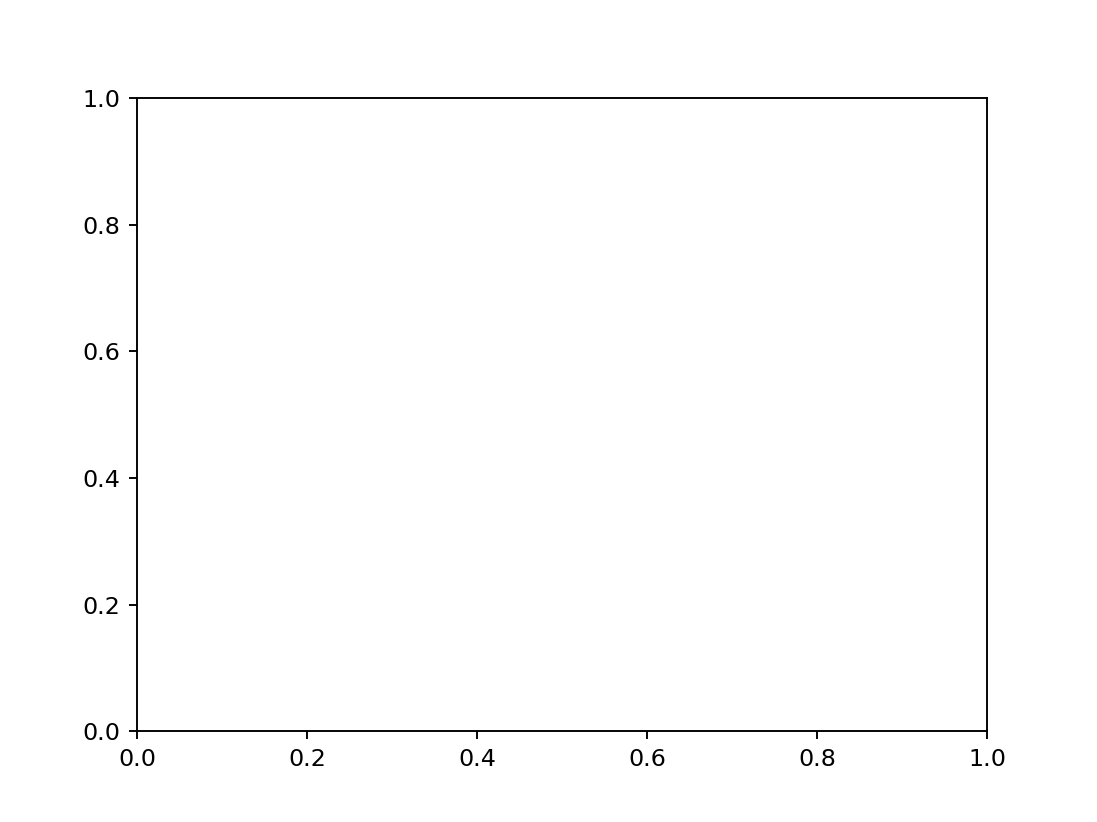

In [6]:
def run_SHO_rk2(t,delta_t) :
    y = np.zeros(2)
    y[0] = 1 # set initial condition
    t1 = 0
    while t1 < t : 
        delta_t = min(t-t1,delta_t)
        y1  = y+SHO_derivatives(t1, y)*0.5*delta_t
        y  += SHO_derivatives(t1+0.5*delta_t, y1)*delta_t
        t1 += delta_t
    return y

from matplotlib.animation import FuncAnimation
 
fig, ax = plt.subplots(1, 1)

def animate(i):
    ax.clear()
    # Get the point from the points list at index i
    delta_t = 0.05
    y = run_SHO_rk2(i*delta_t, delta_t)
    ax.plot(y[0], 0., color='green', marker='o')
    # Set the x and y axis to display a fixed range
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1,1])
ani = FuncAnimation(fig, animate, frames=500, interval=10, repeat=False)


Now challenge problem.  Let's consider a very classic problem from astronomy.  Two massive bodies interacting gravitationally.  The force is a 3-d force which is defined by
$$
F = -\frac{M_1 M_2}{r^2}
$$
we will scale out newton's constant, $G$, here. Suppose you have two bodies.  Go ahead and implement the derivatives.

<IPython.core.display.Javascript object>


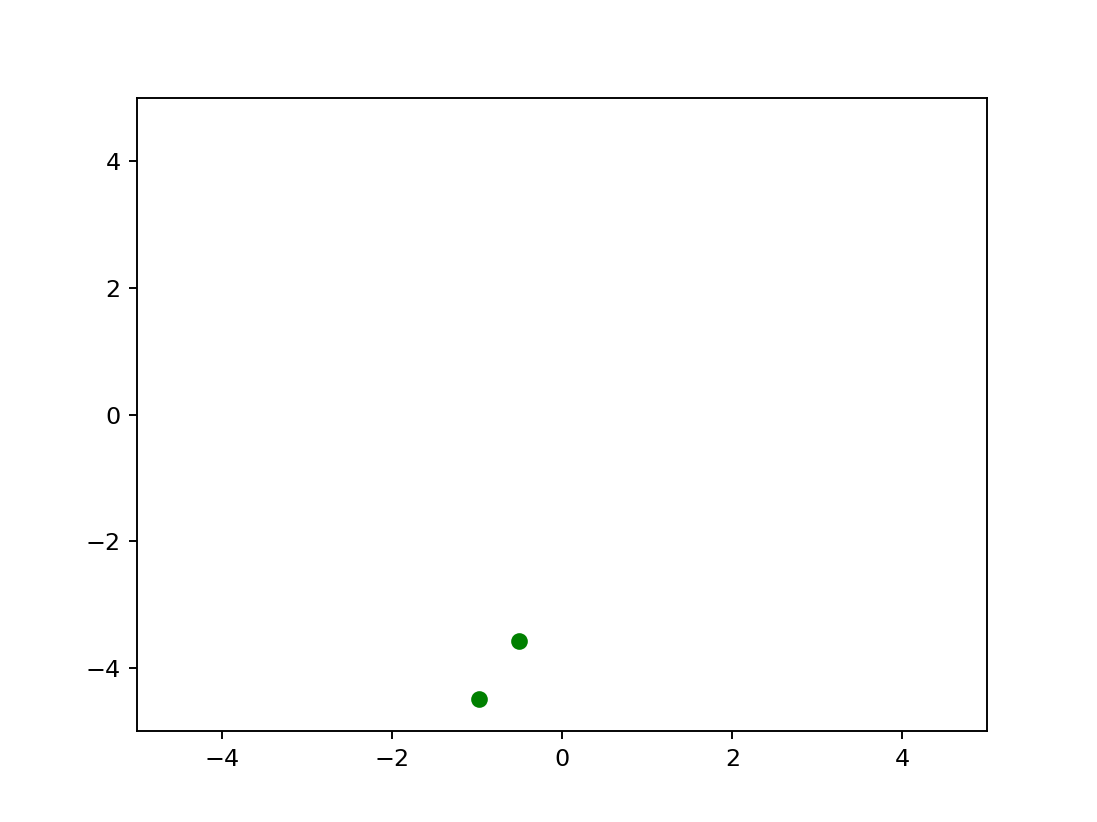

In [27]:
N_massive = 2
N_bodies = N_massive
M = np.array([1.0, 0.25])

def Nbody_derivatives(t,y) :
    pos_and_vel = y.reshape([N_bodies,6])
    pos = pos_and_vel[:,:3]
    vel = pos_and_vel[:,3:]
    dpos_and_veldt = np.zeros([N_bodies,6])
    dpos_and_veldt[:,:3] = vel[:,:]
    for i in range(N_bodies) : 
        r = np.linalg.norm( pos-pos[i],axis=-1)
        mass = M[r>0]
        rhat =(pos - pos[i])[r>0]
        r = r[r>0]
        rhat = rhat/r
        dpos_and_veldt[i,3:] = (mass*(r*r)*rhat).sum(axis=0)
        
    return np.ravel(dpos_and_veldt)

def initial_conditions() : 
    pos_and_vel = np.zeros([N_bodies,6])

    pos_and_vel[0,0] = -1
    pos_and_vel[0,4] = -0.25
    pos_and_vel[1,0] = 1
    pos_and_vel[1,4] = 0.25
    return pos_and_vel

def run_Nbody_rk2(tend,tframe,dt) :
    pos_and_vel = initial_conditions()
    y = np.ravel(pos_and_vel)
    t = 0
    tnext = tframe
    positions = []
    while t<tend :
        while t < tnext :
            delta_t = min(tnext-t,dt)
            yhalf   = y+Nbody_derivatives(t, y)*0.5*delta_t
            y      += Nbody_derivatives(t+0.5*delta_t, yhalf)*delta_t
            t      += delta_t
        pos_and_vel = y.reshape(N_bodies,6)
        positions.append(pos_and_vel[:,0:3].copy())
        tnext += tframe
    return positions

fig, ax = plt.subplots(1, 1)
frames =100
tframe = 0.25
dt = 0.025

positions = run_Nbody_rk2(frames*tframe, tframe, dt)

def animate(i):
    ax.clear()
    # Get the point from the points list at index i
    pos = positions[i]
    ax.scatter(pos[:,0], pos[:,1], color='green', marker='o')
    # Set the x and y axis to display a fixed range
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5,5])
ani = FuncAnimation(fig, animate, frames=frames, interval=25, repeat=False)
